In [2]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.1/38.1 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.3/38.1 MB 2.4 MB/s eta 0:00:16
   ---------------------------------------- 0.4/38.1 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.6/38.1 MB 2.5 MB/s eta 0:00:15
    --------------------------------------- 0.7/38.1 MB 2.7 MB/s eta 0:00:15
    --------------------------------------- 0.8/38.1 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.9/38.1 MB 2.5 MB/s eta 0:00:15
   - -------------------------------------- 1.1/38.1 MB 2.7 MB/s eta 0:00:14
   - -----------

In [5]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2  # OpenCV for image processing

# Set the path to your dataset
dataset_path = r'C:\Users\Paridhi Pasrija\Downloads\plant disease dataset\PlantVillage'

# Get a list of all image files in the dataset
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.JPG') or file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

# Extract class labels from the folder names
class_labels = [os.path.basename(os.path.dirname(file)) for file in image_files]

# Create a DataFrame to store information about the images
data = {'Image': image_files, 'Class': class_labels}
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,Image,Class
0,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight
1,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight
2,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight
3,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight
4,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight


In [6]:
# Function to load and preprocess images
def preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize images to a standard size
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    return img

# Apply the preprocessing function to all images and store them in a new column
df['Preprocessed Image'] = df['Image'].apply(preprocess_image)

# Display the first few rows of the updated DataFrame
df.head()

,Image,Class,Preprocessed Image
0,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight,"[[[0.49411764705882355, 0.4823529411764706, 0...."
1,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight,"[[[0.6627450980392157, 0.6352941176470588, 0.6..."
2,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight,"[[[0.7764705882352941, 0.7647058823529411, 0.7..."
3,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight,"[[[0.3803921568627451, 0.39215686274509803, 0...."
4,C:\Users\Paridhi Pasrija\Downloads\plant disea...,Potato___Early_blight,"[[[0.6196078431372549, 0.615686274509804, 0.67..."


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display the number of samples in the training and testing sets
print("Training set samples:", len(train_df))
print("Testing set samples:", len(test_df))

Training set samples: 1721
Testing set samples: 431


In [9]:
!pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)


In [11]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee25279

In [13]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to extract features using VGG16
def extract_features(img):
    img = preprocess_input(img.reshape(1, 224, 224, 3))
    features = base_model.predict(img)
    return features.flatten()

# Apply the feature extraction function to the training and testing sets
train_features = np.array(train_df['Preprocessed Image'].apply(extract_features).tolist())
test_features = np.array(test_df['Preprocessed Image'].apply(extract_features).tolist())

1/1 [==============================] - 0s 145ms/step


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Extract labels for training and testing sets
train_labels = train_df['Class']
test_labels = test_df['Class']

In [15]:
# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(train_features, train_labels)
logistic_regression_predictions = logistic_regression_model.predict(test_features)

# K-nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_features, train_labels)
knn_predictions = knn_model.predict(test_features)

# Naïve Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(train_features, train_labels)
naive_bayes_predictions = naive_bayes_model.predict(test_features)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(train_features, train_labels)
svm_predictions = svm_model.predict(test_features)

C:\Users\Paridhi Pasrija\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Evaluate Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(test_labels, logistic_regression_predictions))
print("Logistic Regression Classification Report:\n", classification_report(test_labels, logistic_regression_predictions))

# Evaluate K-nearest Neighbors model
print("K-nearest Neighbors Accuracy:", accuracy_score(test_labels, knn_predictions))
print("K-nearest Neighbors Classification Report:\n", classification_report(test_labels, knn_predictions))

# Evaluate Naïve Bayes model
print("Naïve Bayes Accuracy:", accuracy_score(test_labels, naive_bayes_predictions))
print("Naïve Bayes Classification Report:\n", classification_report(test_labels, naive_bayes_predictions))

# Evaluate SVM model
print("SVM Accuracy:", accuracy_score(test_labels, svm_predictions))
print("SVM Classification Report:\n", classification_report(test_labels, svm_predictions))

Logistic Regression Accuracy: 0.8723897911832946
Logistic Regression Classification Report:
                        precision    recall  f1-score   support

Potato___Early_blight       0.89      0.91      0.90       196
 Potato___Late_blight       0.87      0.91      0.89       209
     Potato___healthy       0.57      0.31      0.40        26

             accuracy                           0.87       431
            macro avg       0.78      0.71      0.73       431
         weighted avg       0.86      0.87      0.87       431

K-nearest Neighbors Accuracy: 0.8700696055684455
K-nearest Neighbors Classification Report:
                        precision    recall  f1-score   support

Potato___Early_blight       0.95      0.85      0.90       196
 Potato___Late_blight       0.81      0.97      0.88       209
     Potato___healthy       0.86      0.23      0.36        26

             accuracy                           0.87       431
            macro avg       0.87      0.68      0.72 

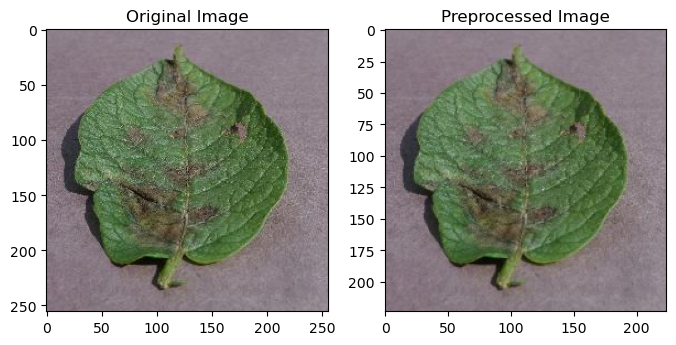

In [20]:
# Function to preprocess a single image
def preprocess_single_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize image to a standard size
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    return img

# Example usage:
new_image_path = r'C:\Users\Paridhi Pasrija\Downloads\plant disease dataset\PlantVillage\Potato___Late_blight\f93b9fc8-469b-4a2f-8c0b-ca3d1a093185___RS_LB 3870.JPG'
# Load the original image
original_image = cv2.imread(new_image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

# Preprocess the new image
preprocessed_image = preprocess_single_image(new_image_path)

# Display the preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image)
plt.title('Preprocessed Image')

# Show the plots
plt.show()

In [21]:
# Extract features
new_features = extract_features(preprocessed_image)

# Make predictions
logistic_regression_prediction = logistic_regression_model.predict(new_features.reshape(1, -1))
knn_prediction = knn_model.predict(new_features.reshape(1, -1))
naive_bayes_prediction = naive_bayes_model.predict(new_features.reshape(1, -1))
svm_prediction = svm_model.predict(new_features.reshape(1, -1))

# Display Results
print("Logistic Regression Prediction:", logistic_regression_prediction[0])
print("K-nearest Neighbors Prediction:", knn_prediction[0])
print("Naïve Bayes Prediction:", naive_bayes_prediction[0])
print("SVM Prediction:", svm_prediction[0])

1/1 [==============================] - 0s 123ms/step
Logistic Regression Prediction: Potato___Late_blight
K-nearest Neighbors Prediction: Potato___Late_blight
Naïve Bayes Prediction: Potato___Late_blight
SVM Prediction: Potato___Late_blight
